In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("owid-covid-data.csv")
df.head()#shows first five rows

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
print(df.columns)#Check avilable columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df.shape#No of rows and columns

(429435, 67)

In [5]:
df.isnull().sum()#identify missing data

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [6]:
df['date']=pd.to_datetime(df['date'])# Drop columns with too many missing value
df=df.drop(columns=[
    'excess_mortality',
    'excess_mortality_cumulative',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative_per_million'],errors='ignore')

In [7]:
countries=['Kenya','India','United States']
df=df[df['location'].isin(countries)]

In [8]:
# Drop rows where critical fields are missing
df = df.dropna(subset=['total_cases', 'date'])
#Fill missing values in rem columns with interpolation
df.interpolate(inplace=True)

C:\Users\ronal\AppData\Local\Temp\ipykernel_17128\50701853.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)


In [9]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)
# Preview the cleaned data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1417173120
1,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1417173120
2,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1417173120
3,IND,Asia,India,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1417173120
4,IND,Asia,India,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,1417173120


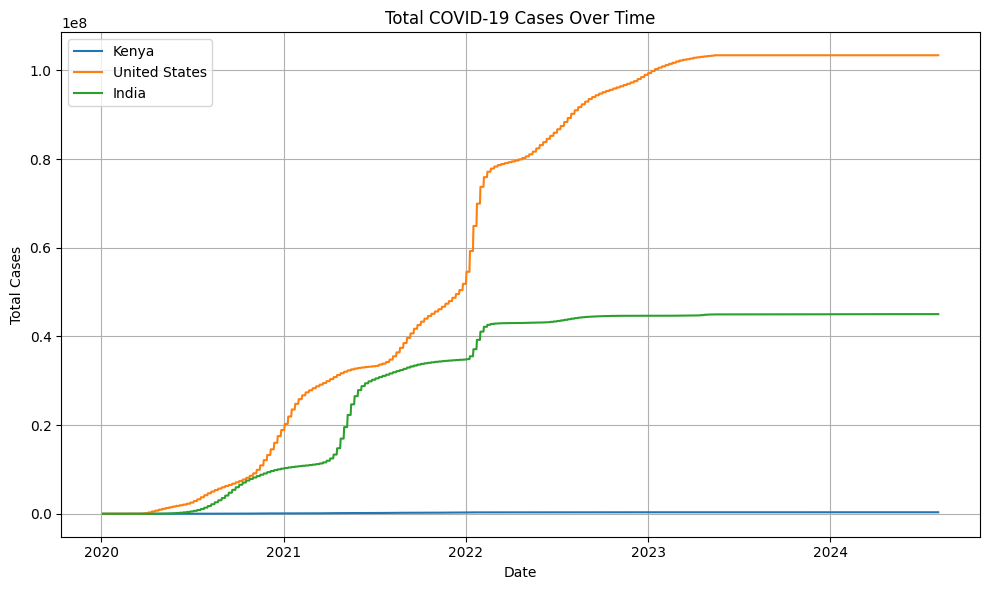

In [10]:
import matplotlib.pyplot as plt
#1. Plot Total Cases Over Time
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

# Plot
plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


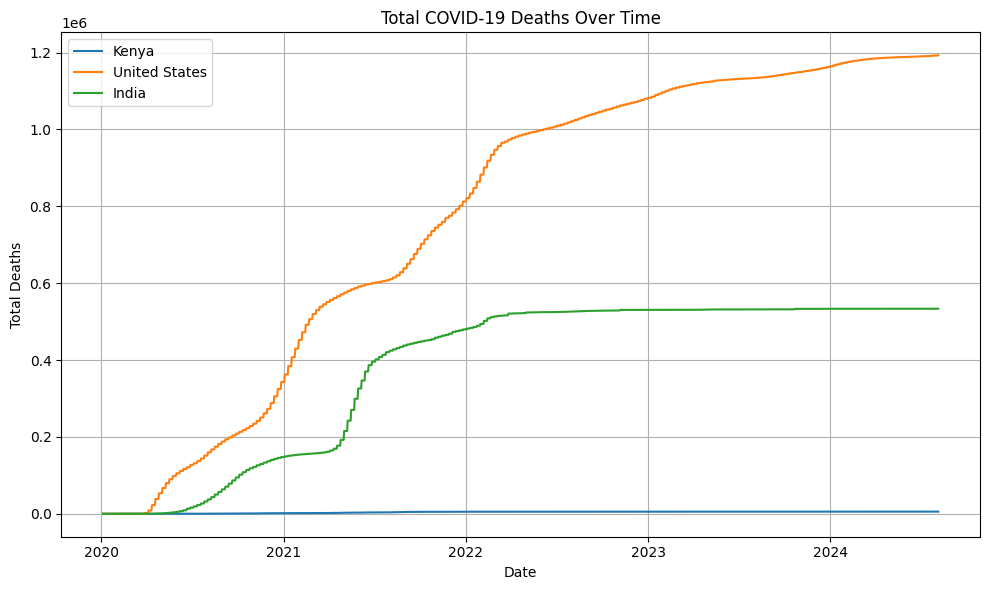

In [11]:
import matplotlib.pyplot as plt
#2. Plot Total Deaths Over 
plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

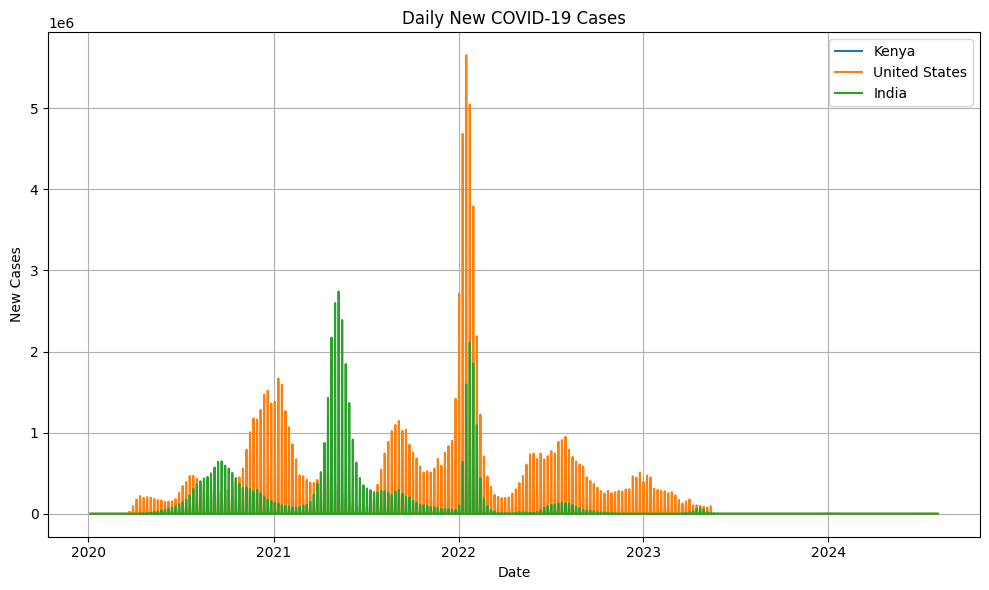

In [12]:
# 3. Compare Daily New Cases
plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

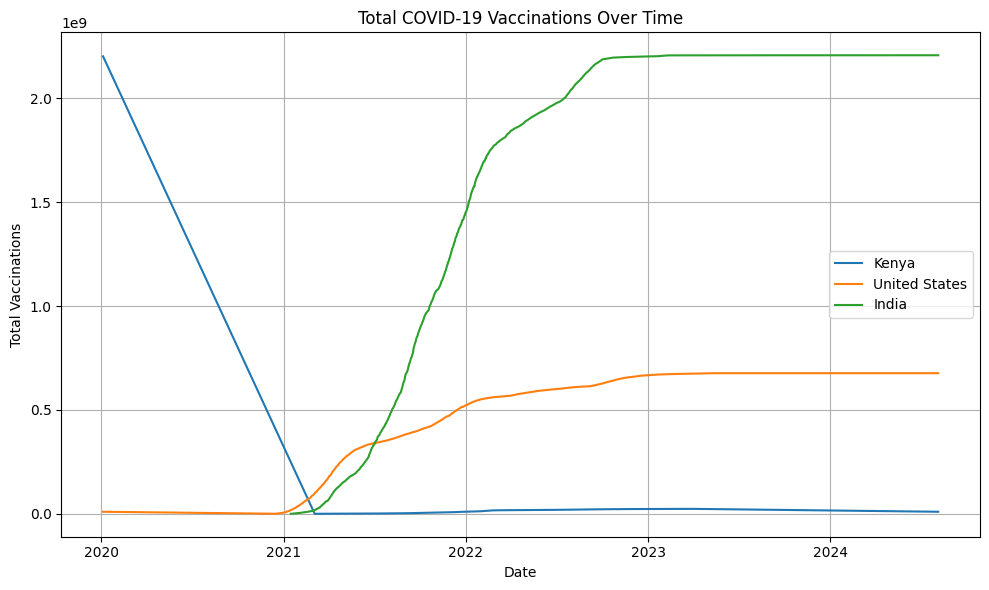

In [13]:
#step 5
import matplotlib.pyplot as plt

countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]

plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


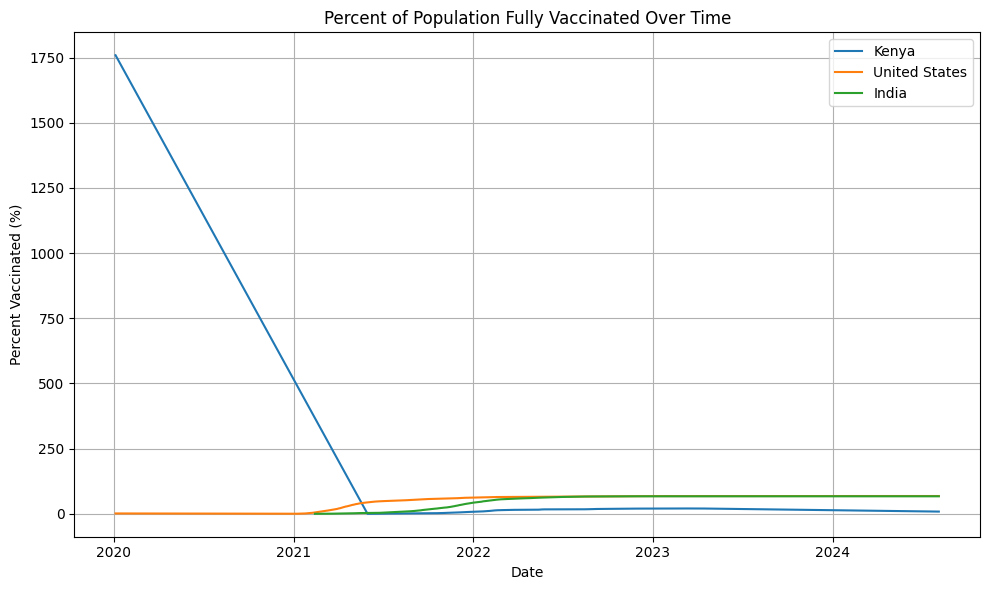

In [14]:
#Vaccinated population
plt.figure(figsize=(10, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country].copy()
    data['percent_vaccinated'] = (data['people_fully_vaccinated'] / data['population']) * 100
    plt.plot(data['date'], data['percent_vaccinated'], label=country)

plt.title("Percent of Population Fully Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Vaccinated (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Step 6
import plotly.express as px
import pandas as pd


# Load dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)
# Get the latest date in the dataset
latest_date = df['date'].max()

# Filter data for the latest date only
latest_data = df[df['date'] == latest_date]

# Remove entries with no iso_code or total_cases
latest_data = latest_data[['iso_code', 'location', 'total_cases']].dropna()

# Plot the map
fig = px.choropleth(
    latest_data,
    locations="iso_code",  # 3-letter country codes
    color="total_cases",   # Color scale based on total cases
    hover_name="location", # Show country name on hover
    color_continuous_scale="Reds",
    title=f"Total COVID-19 Cases by Country as of {latest_date.date()}"
)

fig.show()

# 7 .Key Insights
1. India had a sharp rise in cases during mid-2021, peaking significantly higher than Kenya.
2. United States consistently had the highest number of total cases and deaths throughout the pandemic.
3. Kenya experienced several waves but maintained a lower case count compared to India and the US.
4. Vaccination rollout was fastest in the US, with India catching up quickly by mid-2021. Kenya lagged behind due to access and supply issues.
5. Countries with higher vaccination rates showed a decline in new cases over time.

